In [1]:
from sklearn import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm

In [2]:
x,y,coef = datasets.make_regression(n_samples=500, n_features=1, n_informative=1, bias=3, noise=5,coef=True)

In [3]:
x.shape

(500, 1)

In [4]:
y = y.reshape((500,1))

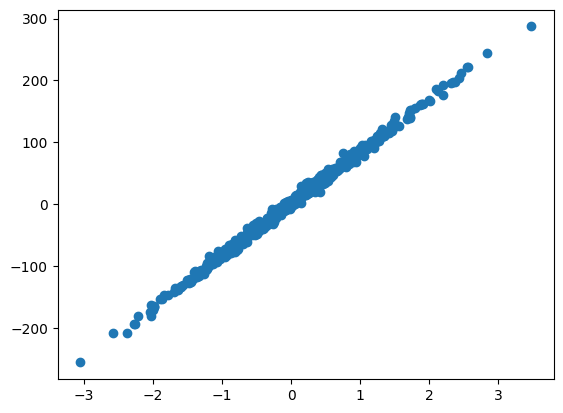

In [5]:
plt.scatter(x,y,)
plt.show()

In [6]:
y2 = y + 3.5 * x**2 + 2*x**3

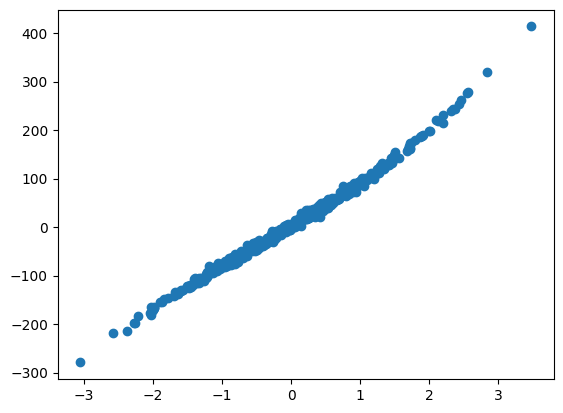

In [7]:
plt.scatter(x,y2)
plt.show()

In [8]:

xeje = np.linspace(-3,3,250)
xeje = xeje.reshape((250,1))
regresiones = []
bias = []
lr = linear_model.LinearRegression()

# Corre 200 iteraciones
for i in range(200):
    
    # Toma muestras de 25 índices aleatorios
    idx = np.random.randint(0,500,25)
    # Idealmente, habría que evitar que se repitan los indexes
    # que pueden salir en train, también en test (info leakage)
    idxtest = np.random.randint(0,500,25)
    x_sample, y_sample = x[idx], y2[idx]
    lr.fit(x_sample, y_sample)

    x_test, y_test = x[idxtest], y2[idxtest]
    bias.append(np.sum(lr.predict(x_test) - y_test))
    regresiones.append([yhat for yhat in lr.predict(xeje)])
    
mean_bias = np.mean(bias)
reg = np.asarray(regresiones)

In [9]:
mean_bias

-10.194643470111261

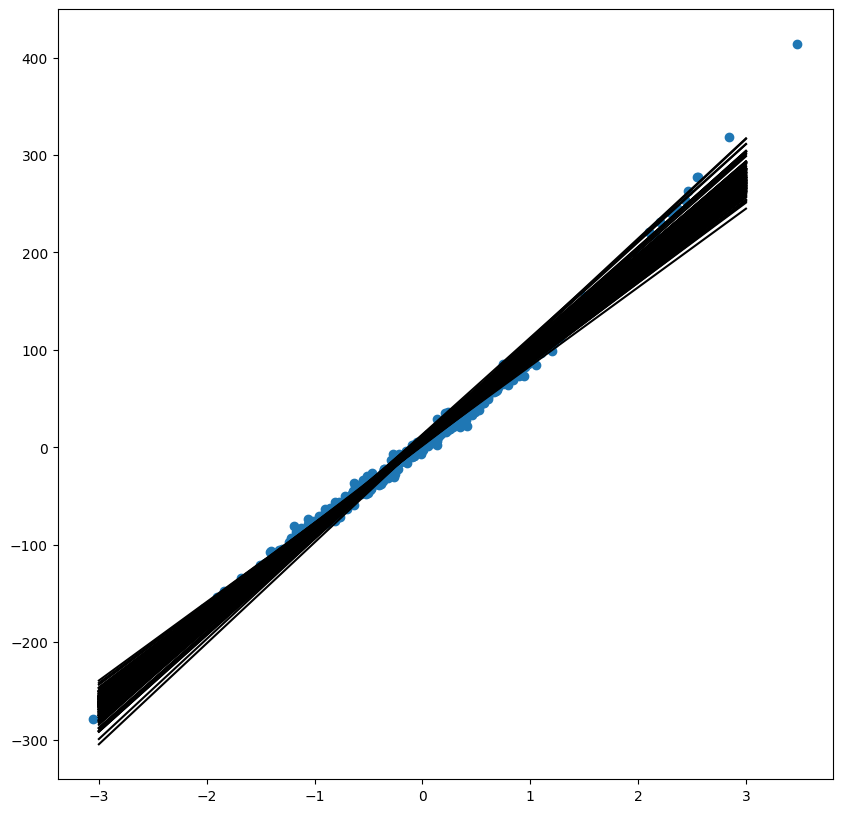

In [10]:
f, ax = plt.subplots(figsize=(10,10))

ax.scatter(x,y2)

for i in range(200):
    ax.plot(xeje,reg[i],c='k')
plt.show()

In [11]:
lr.coef_, lr.intercept_

(array([[93.46911043]]), array([5.78607833]))

In [12]:
def ECM_graph(X,y,w):
    ecm=0.0
    for n,val in enumerate(y):
        y_est = w[0] + w[1]*X[n]
        ecm = ecm + (y_est - y[n])**2
    return ecm/len(y)

In [13]:
# Armamos una grilla con un rango de valores de los pesos
w0 = np.arange(-50,50,1)
w1 = np.arange(-50,50,1)
X0, Y0 = np.meshgrid(w0, w1)

In [14]:
# Calculamos el ECM para todos los posibles valores de w del rango elegido
Z = ECM_graph(x,y2,[X0,Y0])

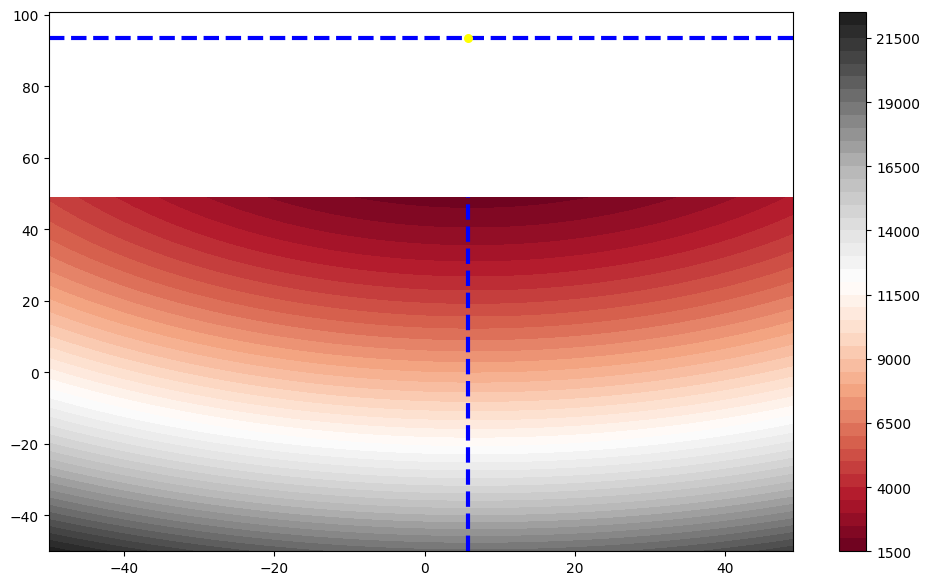

In [15]:
f, ax = plt.subplots(figsize=(12,7))
plt.contourf(X0, Y0, Z, 50, cmap='RdGy')
ax.vlines(x=lr.intercept_, ymin=-50, ymax=49, colors='blue', linestyles='--',lw=3)
ax.hlines(y=lr.coef_, xmin=-50, xmax=49, colors='blue', linestyles='--',lw=3)
ax.scatter(x=lr.intercept_,y=lr.coef_,s=30,c='yellow',zorder=2)
plt.colorbar()
plt.show()

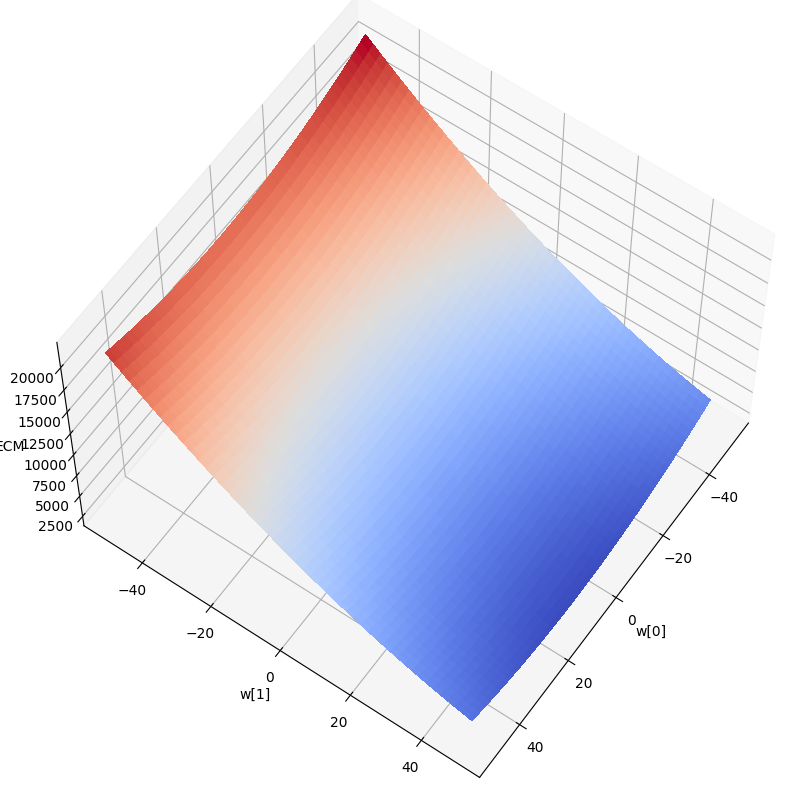

In [16]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
surf = ax.plot_surface(X0, Y0, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlabel('ECM')
ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
ax.view_init(60, 35)

## Datos poco lineales

In [17]:
x,y,coef = datasets.make_regression(n_samples=500, n_features=1, n_informative=1, bias=3, noise=5,coef=True)

In [18]:
y = y.reshape((500,1))

In [19]:
y = 5*np.cos(x) + 3.5 * x**2 + 0.75*x**3

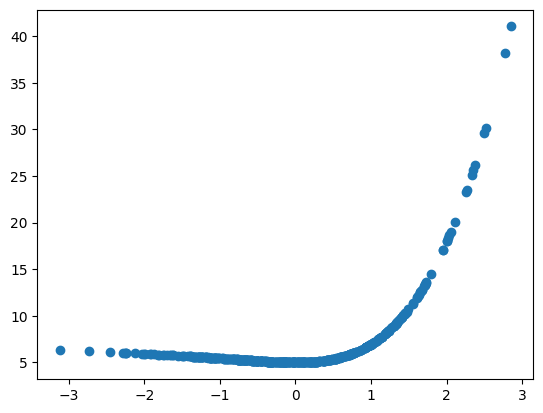

In [20]:
plt.scatter(x,y,)
plt.show()

In [21]:

xeje = np.linspace(-3,3,250)
xeje = xeje.reshape((250,1))
regresiones = []
bias = []

for i in range(200):
    lr = linear_model.LinearRegression()
    idx = np.random.randint(0,500,15)
    # En realidad habría que evitar que se repitan los indexes
    idxtest = np.random.randint(0,500,10)
    x_sample, y_sample = x[idx], y[idx]
    lr.fit(x_sample, y_sample)

    x_test, y_test = x[idxtest], y[idxtest]
    bias.append(np.sum(lr.predict(x_test) - y_test))

    regresiones.append([yhat for yhat in lr.predict(xeje)])
mean_bias = np.mean(bias)
reg = np.asarray(regresiones)

In [22]:
mean_bias

-1.156663292850343

In [23]:
reg.shape

(200, 250, 1)

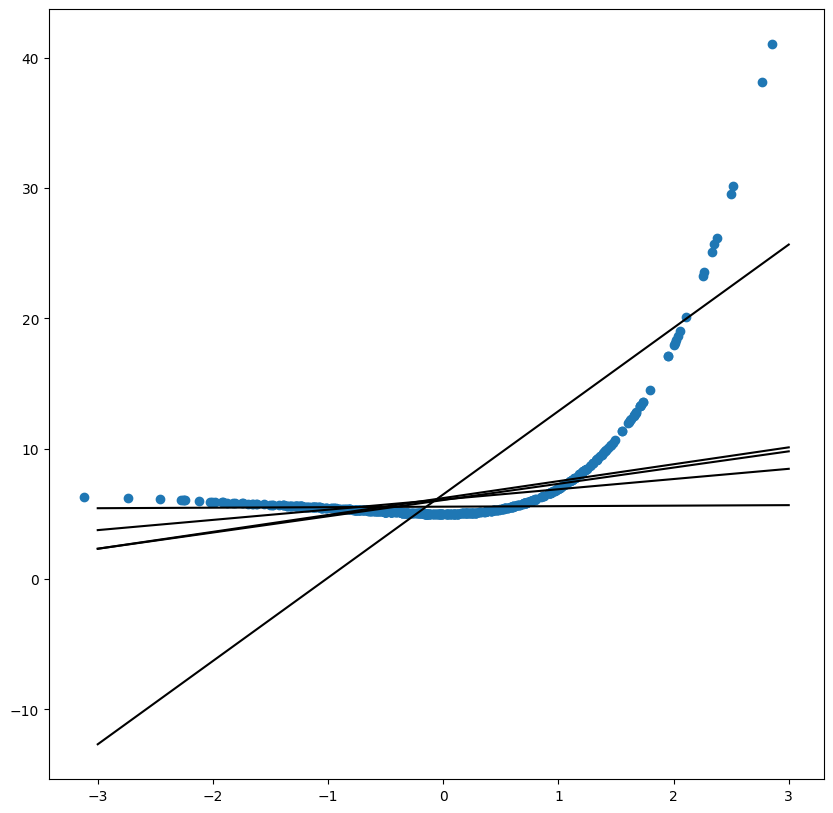

In [24]:
f, ax = plt.subplots(figsize=(10,10))

ax.scatter(x,y)

for i in range(5):
    ax.plot(xeje,reg[i],c='k')
plt.show()